In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'/Users/andrewstephens/Final_project/EDA'

In [3]:
cd .. 

/Users/andrewstephens/Final_project


In [4]:
df = pd.read_csv('Data/DataWrangle.csv',index_col=0)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,balance
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1787.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4789.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1350.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1476.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0


In [5]:
df.set_index(['age'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,balance
age,,,,,,,,,,,,,,,,,,,,,
56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1787.0
57,services,married,high.school,unknown,no,no,telephone,may,mon,149,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4789.0
37,services,married,high.school,no,yes,no,telephone,may,mon,226,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1350.0
40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1476.0
56,services,married,high.school,no,no,yes,telephone,may,mon,307,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,NaN
46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,NaN
56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,NaN


In [6]:
df = df.drop('balance', axis=1)

Dropping the balance column because we are going to try things without balance. Afterwords, we will try to impute balance, along with other features to see if that will make a difference. and ultimately, if it makes sense, we will also use bank.csv to create a different model to compare efficiency as well as feature selection 

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
df.shape

(41188, 21)

In [9]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [11]:
#find percentage of missing values in columns
perct = df.isnull().sum()/df.shape[0] *100
perct[perct!=0]


Series([], dtype: float64)

In [12]:
#checking to see what else is missing
cols = df.isnull().sum()
cols[cols>0]



Series([], dtype: int64)

# 3 questions to guide the analysis 

* Does being married play a factor in whether a person has a loan or not ? 
* Does having a specific profession or career factor in whether someone has a loan? if so ? how many ? 
* Does age play a big factor in who will take a loan ? 


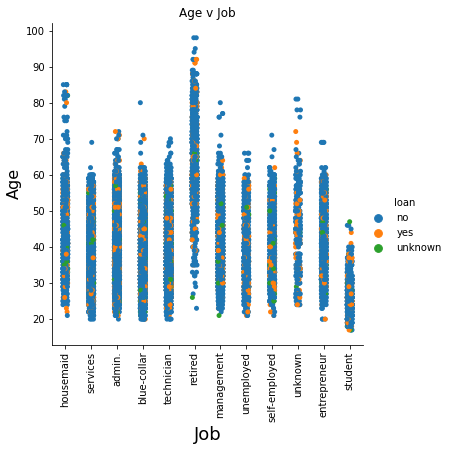

In [13]:


sns.catplot(x="job", y="age", hue="loan", data=df)
plt.xlabel('Job', fontsize=18)
plt.ylabel('Age', fontsize=16)
plt.xticks(rotation=90)
plt.title('Age v Job')
plt.savefig("Data/Age_job_loan.png")
plt.show()


We can see that the retired is the highest percentage group that has taken a loan, followed by bluecollar,technician,services, and management. 

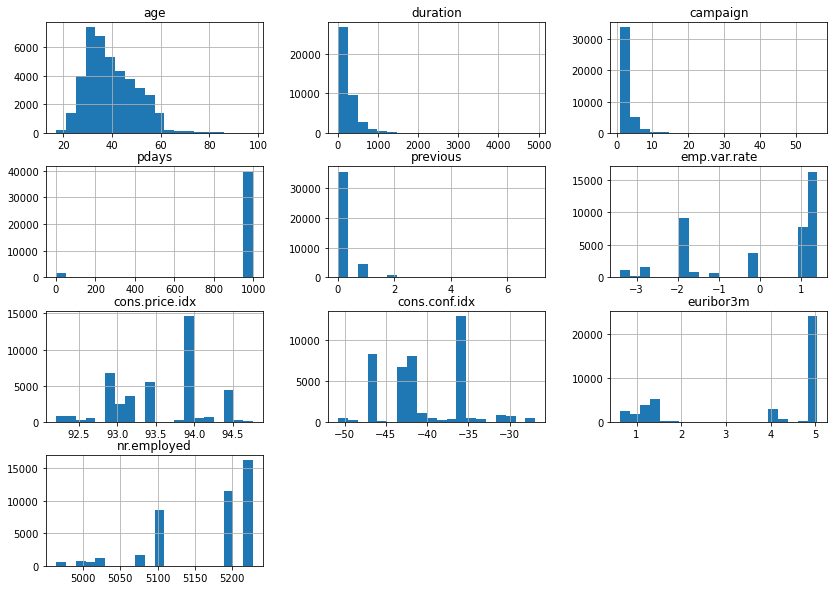

In [14]:
df.hist(bins=20, figsize=(14,10))
plt.show()

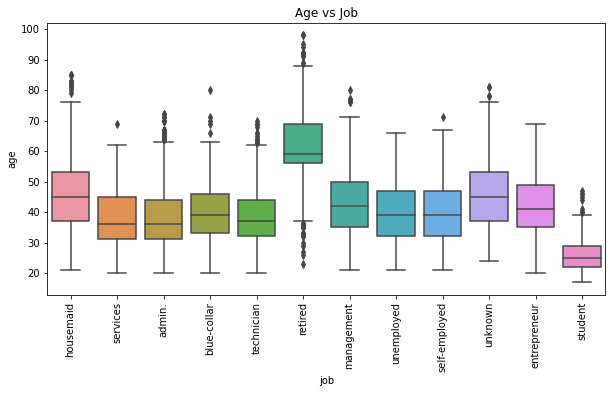

In [15]:
plt.figure(figsize = (10,5))
g = sns.boxplot(x="job", y="age",data= df)
plt.title('Age vs Job')
plt.xticks(rotation=90)
plt.show()


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


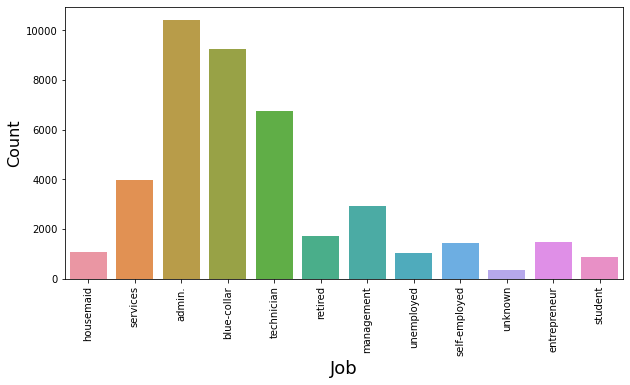

In [16]:
plt.figure(figsize = (10,5))
sns.countplot(df['job'])
plt.xlabel('Job', fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=90)
plt.savefig('Data/opportunity.png')

Above are current customers and can indicate where the marketing efforts should be going to by either focusing on strength(admin,blue collar) or focusing on the weakness and target a whole new segment such as entrepreneuers. 

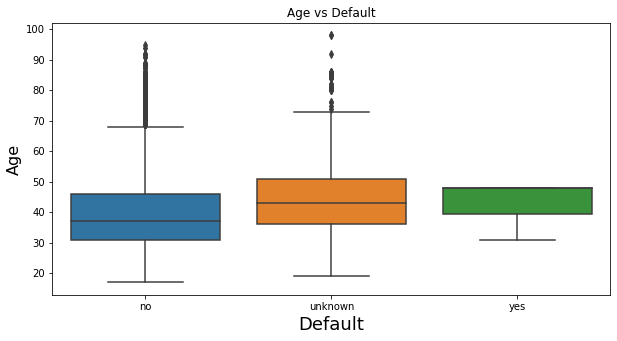

In [17]:
plt.figure(figsize = (10,5))
g = sns.boxplot(x="default", y="age",data= df)
plt.title('Age vs Default')
plt.xlabel('Default', fontsize=18)
plt.ylabel('Age', fontsize=16)
plt.show()

Age 50-40 is the range of people that responded yes to credit default. this age range has the most risk of defaulting on their loan

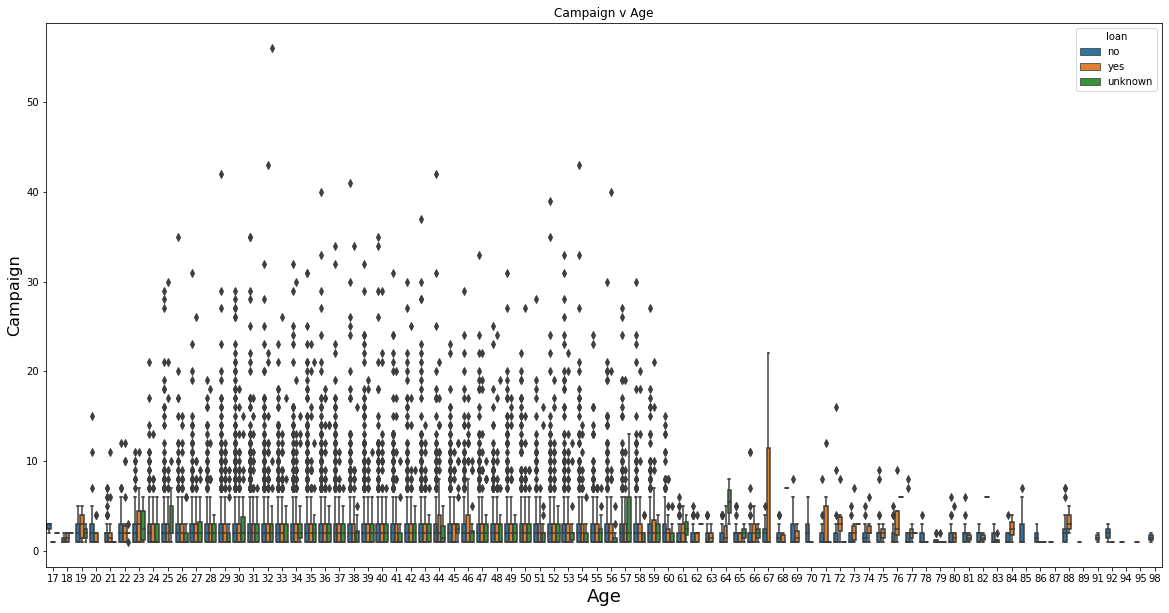

In [18]:
plt.figure(figsize = (20,10))
h = sns.boxplot(x='age',y='campaign',hue='loan',data = df)
plt.title('Campaign v Age')
plt.xlabel('Age', fontsize=18)
plt.ylabel('Campaign', fontsize=16)
plt.savefig("Data/age_campaign_loan.png")

Not including the outliers, the campaign was pretty successful within 10 days if they were able to get in contact their prospects.
age 19,23,44,46,59,67,71,76 are the ages where we see increased spikes. 

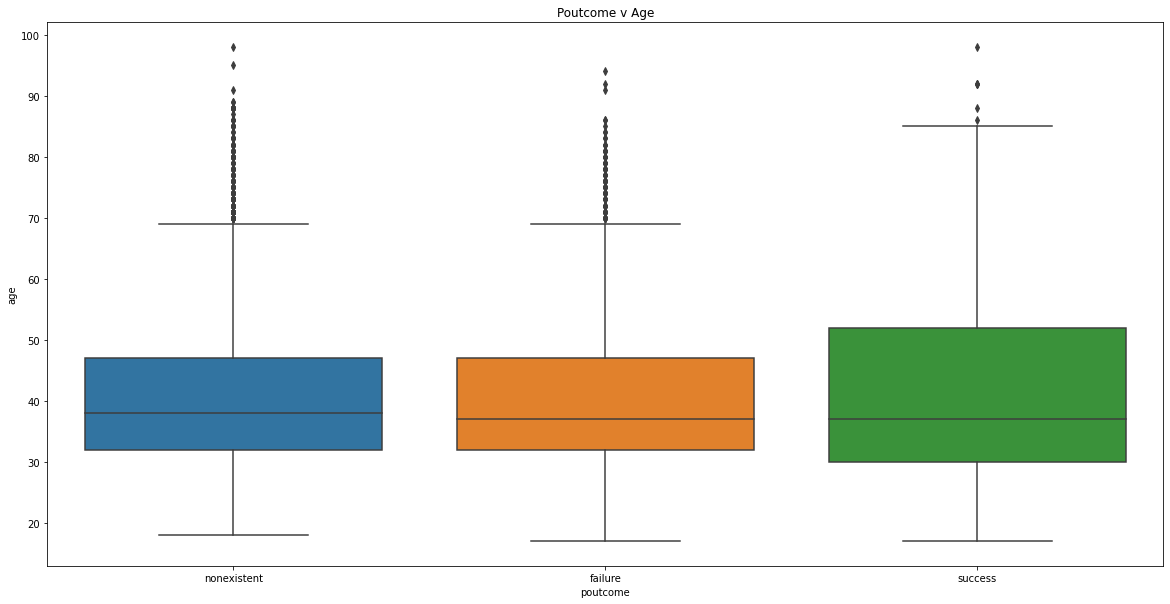

In [19]:
plt.figure(figsize = (20,10))
plt.title('Poutcome v Age')
h = sns.boxplot(x='poutcome',y='age',data = df)

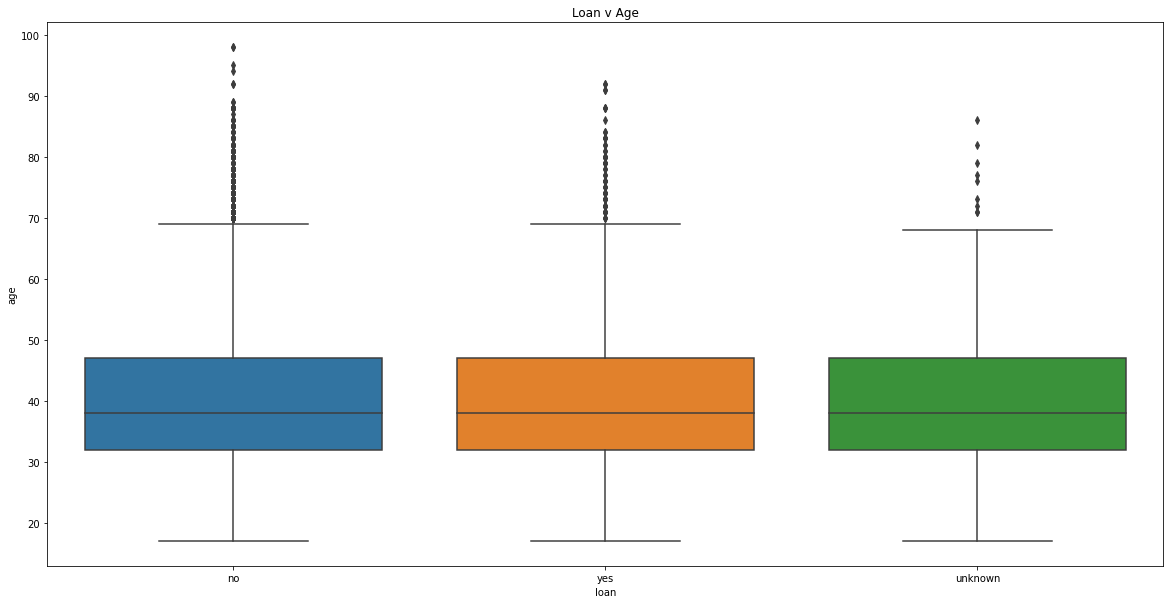

In [20]:
plt.figure(figsize = (20,10))
plt.title('Loan v Age')
h = sns.boxplot(x='loan',y='age',data = df)
plt.savefig("Data/loan_age_targetdemo.png")

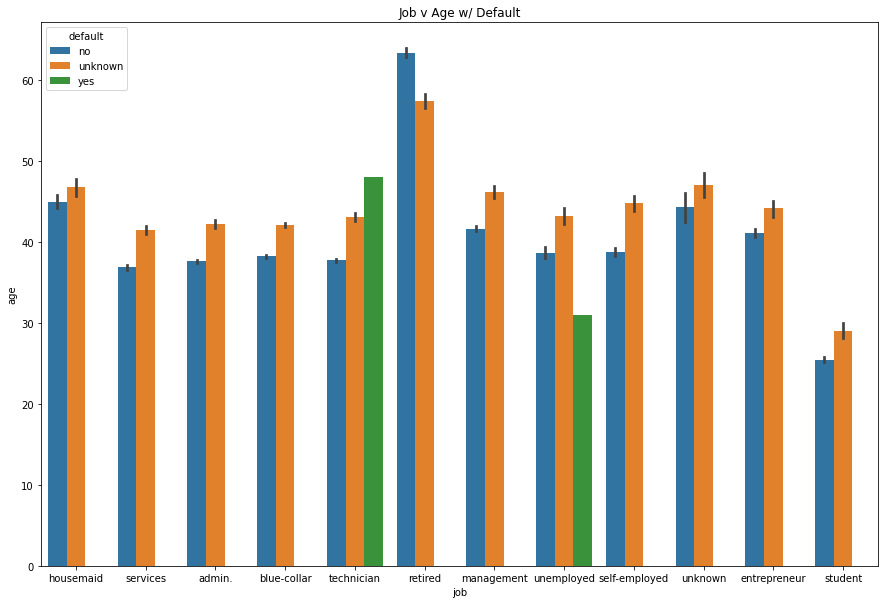

In [21]:
plt.figure(figsize = (15,10))
plt.title('Job v Age w/ Default')
sns.barplot(x="job", y="age", hue="default", data=df)
plt.savefig("Data/job_age_default.png")
plt.show()


Not surprising to see unemployed people defaulting on their loans but what does catch the eye is seeing the technician category filled with people that defaulted. 

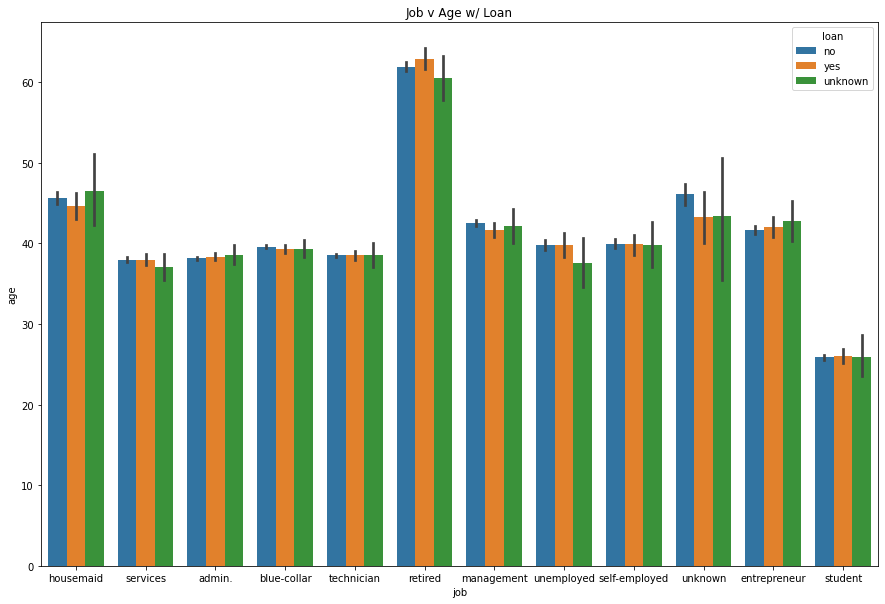

In [22]:
plt.figure(figsize = (15,10))
plt.title('Job v Age w/ Loan')
sns.barplot(x="job", y="age", hue="loan", data=df)
plt.savefig("Data/job_age_loan.png")
plt.show()


# Married  

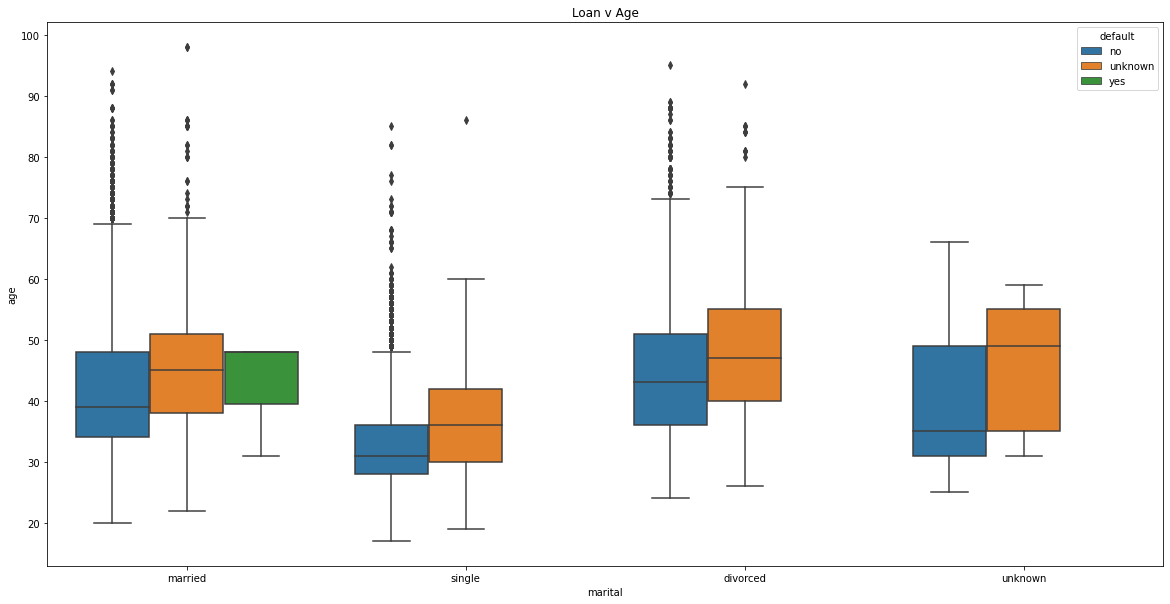

In [23]:
plt.figure(figsize = (20,10))
plt.title('Loan v Age')
h = sns.boxplot(x='marital',y='age',hue='default', data = df)

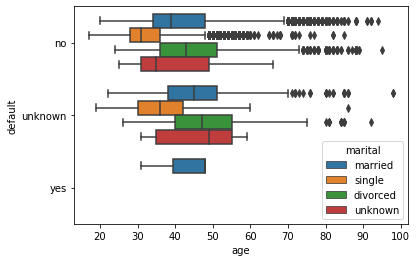

In [24]:
g = sns.boxplot(y='default',x='age',hue='marital',data=df)

Not sure how well this chart came out, the only people that defaulted on their loans were married people which is odd cause we would think logically that people going through divorces wouldnt be able to pay off the loans. 

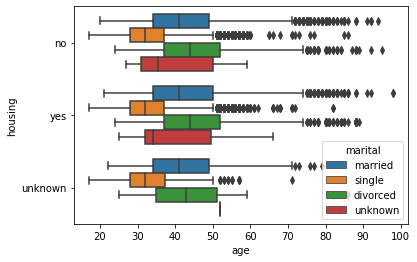

In [25]:
g = sns.boxplot(y='housing',x='age',hue='marital',data=df)

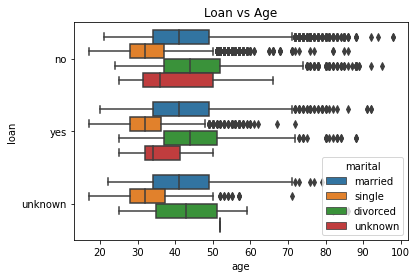

In [26]:
g = sns.boxplot(y='loan',x='age',hue='marital',data=df)
plt.title('Loan vs Age')
plt.savefig("Data/loan_age_marital.png")

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='marital', ylabel='count'>

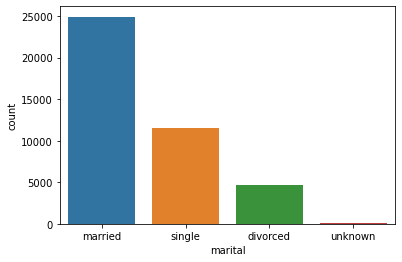

In [27]:
sns.countplot(df['marital'])

Education  

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'basic.4y'),
  Text(1, 0, 'high.school'),
  Text(2, 0, 'basic.6y'),
  Text(3, 0, 'basic.9y'),
  Text(4, 0, 'professional.course'),
  Text(5, 0, 'unknown'),
  Text(6, 0, 'university.degree'),
  Text(7, 0, 'illiterate')])

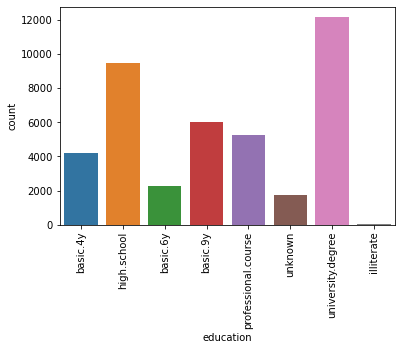

In [28]:
sns.countplot(df['education'])
plt.xticks(rotation=90)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='housing', ylabel='count'>

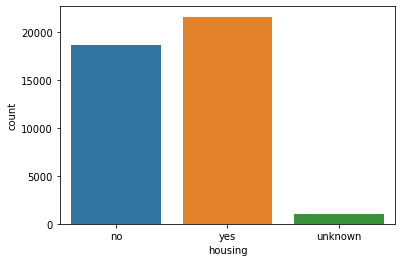

In [29]:
sns.countplot(df['housing'])

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='loan', ylabel='count'>

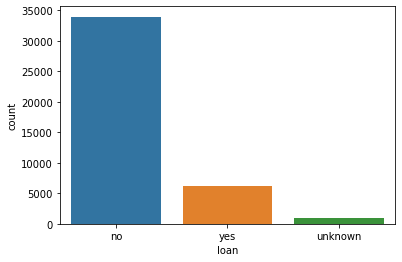

In [30]:
sns.countplot(df['loan'])

## Campaign evaluation 

<Figure size 1440x1080 with 0 Axes>

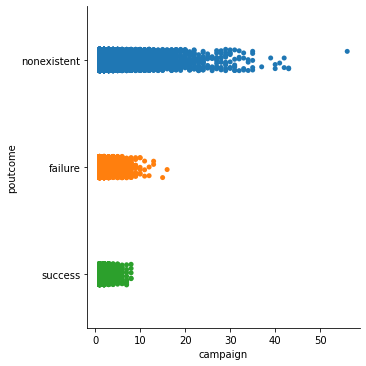

In [31]:
plt.figure(figsize = (20,15))
sns.catplot(x='campaign',y='poutcome',data=df)
plt.savefig("Data/campaign_outcome.png")

<Figure size 1440x1080 with 0 Axes>

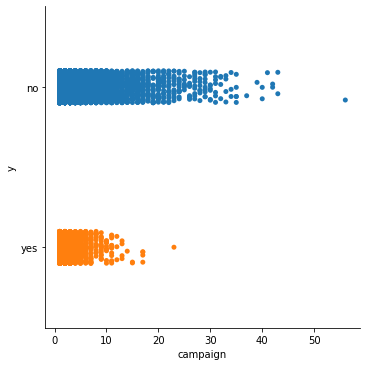

In [32]:
plt.figure(figsize = (20,15))
sns.catplot(x='campaign',y='y',data=df)

Seems as though the campaign is only effective for 10 days at most 

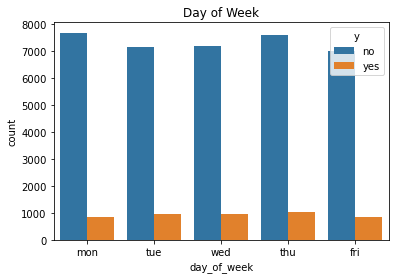

In [33]:
sns.countplot(x = "day_of_week", data = df, hue= "y")
plt.title('Day of Week')
plt.savefig("Data/day_of_week.png")

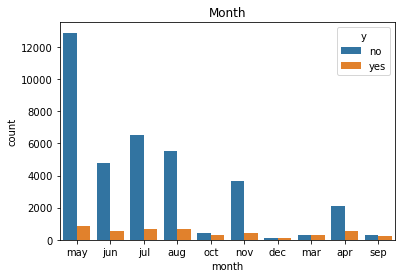

In [34]:
sns.countplot(x = "month", data = df, hue= "y")
plt.title('Month')
plt.savefig("Data/month.png")

Since the target variable is based on past data, we can presume that April-August were the best months of the campaign. 

# Heatmap 

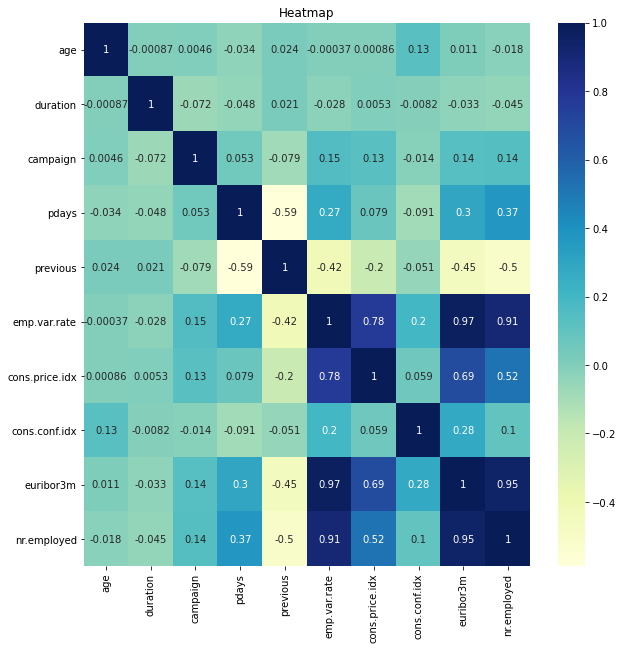

In [35]:
plt.figure(figsize=(10,10))
cor = df.corr()
sns.heatmap(cor,annot=True,cmap="YlGnBu")
plt.title('Heatmap')
plt.savefig("Data/heatmap.png")
plt.show()



Interesting to see company's internal statistics with high correlation.Good thing to note at this point because we will be reducing the features that may disrupt how well our model performs. 


# Employee turnover 

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='emp.var.rate', ylabel='count'>

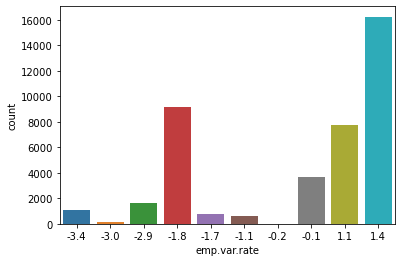

In [36]:
sns.countplot(df['emp.var.rate'])


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '4963.6'),
  Text(1, 0, '4991.6'),
  Text(2, 0, '5008.7'),
  Text(3, 0, '5017.5'),
  Text(4, 0, '5023.5'),
  Text(5, 0, '5076.2'),
  Text(6, 0, '5099.1'),
  Text(7, 0, '5176.3'),
  Text(8, 0, '5191.0'),
  Text(9, 0, '5195.8'),
  Text(10, 0, '5228.1')])

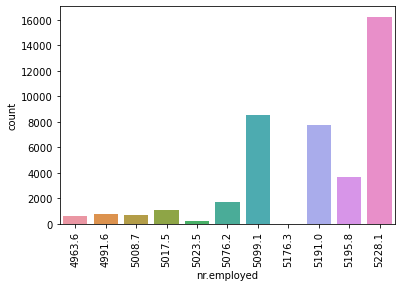

In [37]:
sns.countplot(df['nr.employed'])
plt.xticks(rotation=90)

<Figure size 1440x1080 with 0 Axes>

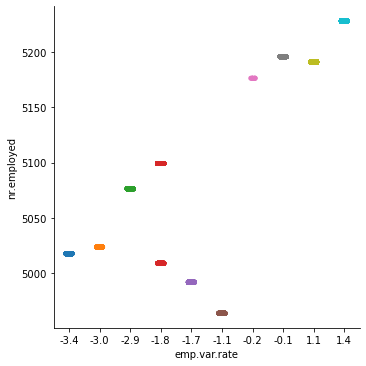

In [38]:
plt.figure(figsize = (20,15))
sns.catplot(x='emp.var.rate',y='nr.employed',data=df)

Wish we had some time that came with the data, so that way we could do a time analysis to see if we could find a trend when it came to turnover and employees. However, there's not much we can apply from the data given.


In [39]:
df.to_csv('Data/EDA.csv')

# Checking for inbalance 

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='y', ylabel='count'>

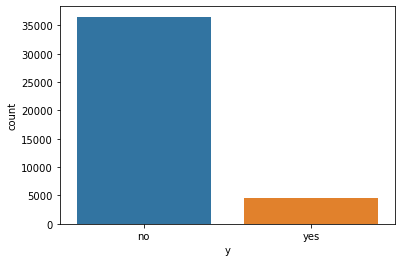

In [40]:
sns.countplot(df['y'])

Shows that we have an inbalanced data set that will correct in the next chapter 

In [41]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [42]:
#above shows how imbalanced our data set is.This will be addressed in the modeling chapter. 